# 카드 이탈자 예측
### 머신러닝 기반 카드 고객 이탈자 예측
- 개요
- 데이터 수집
- 데이터 확인 및 시각화 
- 데이터 전처리 및 피쳐 엔지니어링
- 모델링
- 테스팅

# 개요

- 카드 회사들은 고객 유치를 위해 많은 프로모션을 진행
- 새로운 고객을 유치하는 것보다 기존 고객을 유지하는 것이 경제적 효과큼
- 기존 고객의 이탈 여부를 사전에 예측 가능한 모델 구축

## 데이터 정보

- 데이터 Kagle 출처 (링크 [kaggle](https://www.kaggle.com/sakshigoyal7/credit-card-customers))
- 은행의 고객 중에서 신용카드 고객 이탈자에 대한 자료
- 이탈 고객의 16.07%만 자료를 가지고 있어서 한계가 있는 데이터임
- 연령, 급여, 결혼 여부, 신용카드 한도, 신용카드 등급 등 여러 정보를 가지고 고객 분석 가능

**모듈 임포트**

In [11]:
import pandas as pd # 데이터 핸들링 
import numpy as np 
import matplotlib.pyplot as plt # 데이터 시각화 
%matplotlib inline
import seaborn as sns # 데이터 시각화(고급분석)

In [52]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

**데이터 불러오기**
- 데이터명 : **df**
- 경로 :  **"./data/BankChurners.csv"**로 통일하였다.

In [40]:
df = pd.read_csv("./data/BankChurners.csv")
## 불필요한 열 2개 제거
df = df.iloc[:,:-2]

### 데이터 정보
- ~'CLIENTNUM' : 고객 식별 번호~
- 'Attrition_Flag' : 신용 카드 이탈 여부 **``Target 값``**
    - Existing Customer : 잔류
    - Attrited Customer : 이탈
- 'Customer_Age' : 고객 나이
- 'Gender' : 성별
- 'Dependent_count' : 부양 가족 수
- 'Education_Level' : 학력 수준
- 'Marital_Status' : 결혼 여부
- 'Income_Category' : 연 소득 구간
- 'Card_Category' : 카드 등급
- 'Months_on_book' : 카드 할부 기간
- 'Total_Relationship_Count' : 가입 상품 수
- 'Months_Inactive_12_mon' : 1년 동안 카드 결재 내역이 없는 비활성 기간(개월)
- 'Contacts_Count_12_mon' : 연락 빈도
- 'Credit_Limit' : 신용 한도
- 'Total_Revolving_Bal' : 할부 잔액
- ~'Avg_Open_To_Buy' : 평균 실 사용 가능 금액 :  'Credit_Limit' -  'Total_Revolving_Bal'~
- ~'Total_Amt_Chng_Q4_Q1'~ : 결제 대금 기준 1분기 대비 4분기 (비율) 
- ~'Total_Trans_Amt'~ : 실제 사용 총액
- 'Total_Trans_Ct' : 실제 사용 횟수
- 'Total_Ct_Chng_Q4_Q1' : 1분기 대비 4분기 결제 대금 횟수 비율
- ~'Avg_Utilization_Ratio' : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)~

| 변수명                   | 변수형태 | 구분     |
| :------------------------: | :--------: | :--------: |
| CLIENTNUM                | INT      | 피처변수 |
| Customer_Age             | INT      | 피처변수 |
| Gender                   | Object   | 피처변수 |
| Dependent_count          | INT      | 피처변수 |
| Education_Level          | Object   | 피처변수 |
| Marital_Status           | Object   | 피처변수 |
| Income_Category          | Object   | 피처변수 |
| Card_Category            | Object   | 피처변수 |
| Months_on_book           | INT      | 피처변수 |
| Total_Relationship_Count | INT      | 피처변수 |
| Months_Inactive_12_mon   | INT      | 피처변수 |
| Contacts_Count_12_mon    | INT      | 피처변수 |
| Credit_Limit             | INT      | 피처변수 |
| Total_Revolving_Bal      | INT      | 피처변수 |
| Avg_Open_To_Buy          | INT      | 피처변수 |
| Total_Amt_Chng_Q4_Q1     | INT      | 피처변수 |
| Total_Trans_Amt          | INT      | 피처변수 |
| Total_Trans_Ct           | INT      | 피처변수 |
| Total_Ct_Chng_Q4_Q1      | INT      | 피처변수 |
| Avg_Utilization_Ratio    | INT

**데이터 확인**

In [41]:
## 데이터 유형 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [42]:
df.head() # 전처리를 하고 나눈다 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [43]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**시각화** 
- 사용할 데이터의 상관관계를 파악하기 위해 시각화
- 모든 칼럼에 대한시각화 

In [101]:
### 실행시간으로 인한 주석 처리
# sns.pairplot(df)

**결측치 확인**
- 결측치가 존재하지 않는 것을 확인
- 각각 피쳐를 분석해서 결측치 해당 여부 파악이 필요

In [44]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# 읽기 싫음 김희진님 수정 요청

### 전처리를 하는데 제일 많이 헷갈려 하는 부분 중 하나가 데이터의 타입이다. 지금 모든 피처변수(독립변수)가 숫자로 되어있지만, 이 안을 잘 구분해서 보면 범주형 변수랑 수치형 변수로 나누어져있다.

1. 첫번째로 "CLIENTNUM"는 고객번호인데, 이것은 아무의미도 없는 숫자이다. 고객을 식별하기 위해 부여한 아이디(식별자)일뿐다. (후에 삭제할 예정)

2. "Attrition_Flag", "Gender", "Marital_Status"는 범주화 되어 있고 이 칼럼들은 나중에 인코딩을 하게되는데,
     "Attrition_Flag"은 0,1 "Gender"은 0,1 "Marital_Status"은 0,1,2... 이런식으로 인코딩을 하게 될것이다. 하지만 이 인코딩 된 숫자들(0,1,2...)들은 사실상 범주를 뜻할 뿐이지 그 수 자체에 아무런 의미는 없다. (**명목척도**)
  
3. "Education_Level","Income_Category","Card_Category" 등도 범주화 된 변수들이지만, 이 변수들은 인코딩을 할 때 순서가 있게 된다. 예를 들면 카드는 blue-silver-gold-platinum 으로 카드 간의 등급을 매길 수가 있는데 이 순서대로 blue(0)-silver(1)-gold(2)-platinum(3) 인 코딩을 하게 되면 0,1,2,3으로 변수들간의 순서(서열)을 매길 수 있게 된다. (**서열척도**)

3. 그리고 나머지 모든 변수들 'Customer_Age','Dependent_count'... 등은 데이터들이 하나의 **수치**를 가지게 된다. (**수치형변수**)
     

## 타겟 데이터 확인하기

- 관측 대상 : **``"Attrited Customer"``** 1로 설정 (카드 회원 탈퇴)
- 비관측 대상 : **``"Existing Cumstomer"``** 0으로 설정 (카드 유지)

In [45]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<AxesSubplot:>

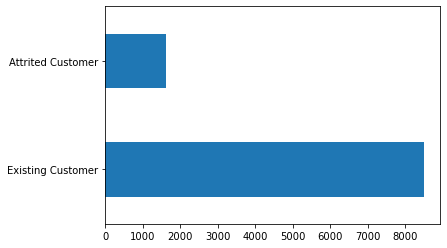

In [50]:
df["Attrition_Flag"].value_counts().plot(kind = 'barh')

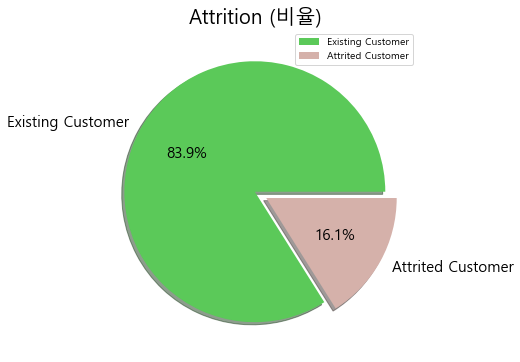

In [70]:
labels = ['Existing Customer', 'Attrited Customer']
size = df['Attrition_Flag'].value_counts()
colors = ['#5bc959','#d5b1aa' ]
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.1f%%", shadow = True, textprops = {'fontsize':15})
plt.axis('off')
plt.title('Attrition (비율)', fontsize = 20)
plt.legend()
plt.show()

**라벨링 코딩**
- "Existing Cumstomer" : 0 (카드 유지)
- "Attrited Customer" : 1 (카드 회원 탈퇴)


**주의**
``"탈퇴"여부이기 때문에 탈퇴를 1, 잔존을 0으로 하여 인코딩``

In [71]:
df["Attrition_Flag"].replace({"Existing Customer":0,
                            "Attrited Customer":1,
                            },inplace=True)

# 여기까지 작업

<AxesSubplot:>

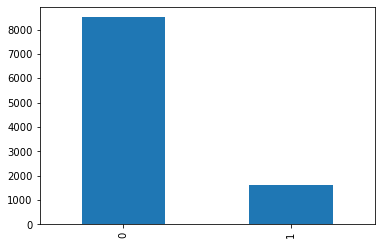

In [39]:
df["Attrition_Flag"].value_counts().plot(kind = 'bar')

In [21]:
df["Attrition_Flag"].value_counts() # 전처리 확인

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

**Existing Cumstomer(잔존)과 Attrited Customer(이탈)의 비율**

**Existing Cumstomer(잔존)과 Attrited Customer(이탈)의 비율에 차이가 있다. 수치를 비교해보도록 한다.**

In [38]:
Existing = df[df["Attrition_Flag"]==0]
Attrited = df[df["Attrition_Flag"]==1]

Existing_ratio = len(Existing)/len(Existing+Attrited)
Attrited_ratio = len(Attrited)/len(Existing+Attrited)

print("카드를 유지한 고객은 {:.2f} 이고, 탈퇴 고객은 {:.2f}이므로, 카드를 유지한 고객이 {:.0f}배 많다".format(Existing_ratio,Attrited_ratio,Existing_ratio/Attrited_ratio))

카드를 유지한 고객은 0.84 이고, 탈퇴 고객은 0.16이므로, 카드를 유지한 고객이 5배 많다


**업샘플링(오버샘플링)이나 다운샘플링(언더샘플링)이 필요한지 확인해 보아야한다.(업샘플링을 해야한다)**

**업샘플링은 전처리 과정이 아니라, 모델을 돌리면서 성능을 높이기 위한 작업과정이다 >> **업샘플링 하기 전에 모델링을 한번 하고 >> 모델의 성능을 높이기 위한 방법으로 업샘플링을진행한다****

**분류 분석에서의 피처(독립)변수들은 피처들간의 상관성이 높지 않은 이상은 웬만하면 버리지 않고(삭제하지 않고) 쓰는 방향으로 작업을 진행한다**

## 피처 데이터 확인 하기

**나이 칼럼 확인 하기**

C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

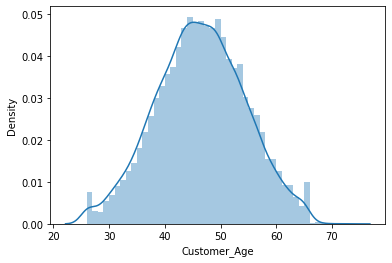

In [108]:
sns.distplot(df["Customer_Age"])

**Customer_Age (나이) 칼럼은 거의 완벽한 정규분포를 따른다는 것을 알 수 있다.**

**이상치 확인(시각화)**

C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age'>

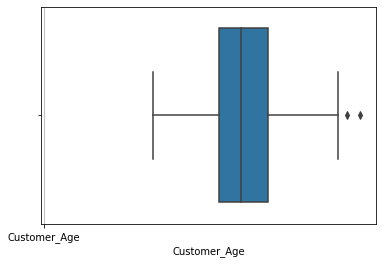

In [109]:
df[["Customer_Age"]].boxplot()
sns.boxplot(df["Customer_Age"])

**이상치 확인 (수치 확인)**
    여기서 박스플롯에서 범위 밖으로 넘어가는 2개의 plot이 보이는데, 이 값이 이 범위를 벗어난다고 하더라도, 이 수치가 데이터 분석에 큰 영향을 끼치지 않으면 ( 말이 안되는 값이거나 범위에서 너무 벗어난 값 -예를 들면 우리나라 연봉을 조사하는데 이재용 삼성 부회장의 연봉은 제외를 해야 한다. ) 그 값은 이상치로 취급하지 않는다.

In [110]:
df["Customer_Age"].max()

73

**나이 칼럼에서 가장 큰 수치는 73인데 이 수치는 충분히 가능한 값이다.만약 이 값이 200이다 라고 한다면 이 이상치는 삭제나 대체가 필요하지만, 73세는 나이로서 충분히 가능한 수치이므로 전처리 하지않는다.(이상치 취급하지 않음)**

In [111]:
# 이상치 확인 (참고 사항)
q1 = np.quantile(df["Customer_Age"],0.25)  
q3 = np.quantile(df["Customer_Age"],0.75) 
iqr = q3-q1
q3+iqr*1.5
q1-iqr*1.5

cond1 = q3+iqr*1.5<df["Customer_Age"]
cond2 = df["Customer_Age"]<q1-iqr*1.5

outlier_index = df[cond1 | cond2].index

**Gender(성별)**

<AxesSubplot:>

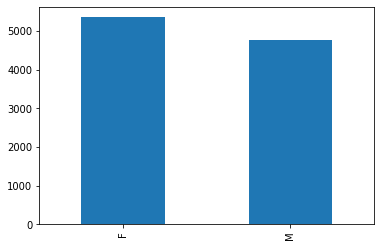

In [112]:
# 성별 bar chart
df['Gender'].value_counts().plot(kind = 'bar')

In [113]:
# 성별 이탈고객 수
gend_df = pd.DataFrame(df.loc[:,['Gender','Attrition_Flag']].value_counts())
gend_df

,,0
Gender,Attrition_Flag,
F,0,4428
M,0,4072
F,1,930
M,1,697


In [114]:
# 성별 평균 나이
df.groupby('Gender')['Customer_Age'].agg(**{'Customer_Age':'mean'}).reset_index()

,Gender,Customer_Age
0,F,46.456887
1,M,46.178863


In [115]:
# 성별 나이 분포
df[['Gender','Customer_Age']].value_counts()

Gender  Customer_Age
F       44              277
        45              272
        49              263
        47              258
        48              249
                       ... 
        66                2
M       67                2
        68                2
        70                1
        73                1
Length: 86, dtype: int64

In [116]:
# 성별 라벨링 F : 0, M : 1
df["Gender"].replace({"F":1, "M":0},inplace=True)

In [117]:
df["Gender"].value_counts()
# Female 아니면 Male로 이진분류가 잘 되어있다.
# Label Encoding을 해주면 되겠다.

1    5358
0    4769
Name: Gender, dtype: int64

In [118]:
# 다른 코드 
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df["Gender"])
# df["Gender"] = le.transform(df["Gender"])

In [119]:
df["Gender"] # 라벨인코딩 된 것을 확인 할 수 있다.

0        0
1        1
2        0
3        1
4        0
        ..
10122    0
10123    0
10124    1
10125    0
10126    1
Name: Gender, Length: 10127, dtype: int64

In [120]:
# 부양 가족 수 값
df['Dependent_count'].value_counts().index

Int64Index([3, 2, 1, 4, 0, 5], dtype='int64')

C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Dependent_count'}, xlabel='Dependent_count', ylabel='count'>

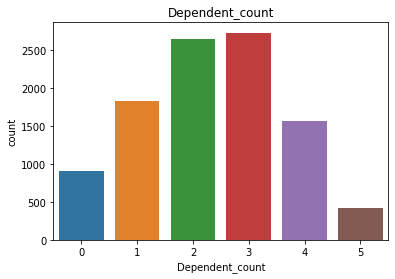

In [121]:
# 부양 가족 수 분포
plt.title('Dependent_count')
sns.countplot(df["Dependent_count"])

In [122]:
bins = list(range(20,81,10))
bins

[20, 30, 40, 50, 60, 70, 80]

In [123]:
labels = [str(i) + '대' for i in bins]
labels

['20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [124]:
# 나이대 라벨 추가
df["age_bin"] = pd.cut(df["Customer_Age"], bins = bins, right = False, labels=labels[:-1])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_bin
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대


In [125]:
# 연령대별 평균 부양가족 수
dependent = df.groupby('age_bin')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
dependent

,age_bin,dependent
0,20대,0.430769
1,30대,2.002173
2,40대,2.970401
3,50대,2.055037
4,60대,0.530189
5,70대,0.000000


<AxesSubplot:xlabel='age_bin', ylabel='dependent'>

C:\Users\ahj93\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ahj93\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


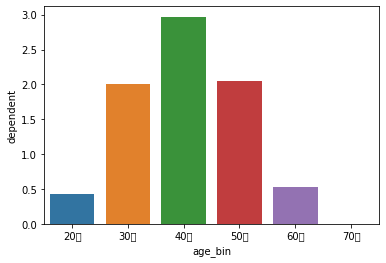

In [126]:
# 연령대별 평균 부양 가족 수
sns.barplot(x='age_bin',y='dependent',data=dependent)

In [127]:
# 성별 평균 부양가족 수
gender = df.groupby('Gender')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
gender

,Gender,dependent
0,0,2.352485
1,1,2.340612


In [128]:
# 연령대별 이탈고객
age_churn = pd.DataFrame(df.loc[:,['age_bin','Attrition_Flag']].value_counts().sort_index(ascending=True))
age_churn

0
age_bin Attrition_Flag      
20대     0                178
        1                 17
30대     0               1580
        1                261
40대     0               3789
        1                772
50대     0               2492
        1                506
60대     0                459
        1                 71
70대     0                  2

**결측치는 상관성을 보고 평균을 내보고, 상관이 없을때는 대표값으로 채운다**

In [129]:
df.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'age_bin'],
      dtype='object')

**피처변수들은 Labels(명목척도) , Orders(서열척도), Numerics(수치형) 변수로 나누었다.**

**범주형 변수들은 Unknown이라는 결측치를 가지고 있기 때문에 범주형 변수들만으로 결측치를 채우기에는 역부족이라고 생각한다. 그래서 범주형 변수들과 (결측치가 없는)수치형 변수들의 상관관계를 조사하여 결측치를 채워보도록하겠다** 

In [130]:
Labels = ['Gender','Marital_Status'] # 명목 척도
Orders = ['Education_Level','Income_Category','Card_Category'] # 서열 척도 (등간 척도)
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] # 수치형 변수

# 범주형 피처 인코딩

In [131]:
df["Card_Category"].replace({"Blue":0,
                                 "Silver":1,
                                 "Gold":2,
                                 "Platinum":3,
                                 },inplace=True)

In [132]:
def bar_chart(feature):
    stay = df[df['Attrition_Flag']==0][feature].value_counts()
    leave = df[df['Attrition_Flag']==1][feature].value_counts()
    temp = pd.DataFrame([stay,leave])
    temp.index = ['Existing Customer','Attrited Customer']
    temp.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

## Education_Level 수준에 따른 고객 이탈자

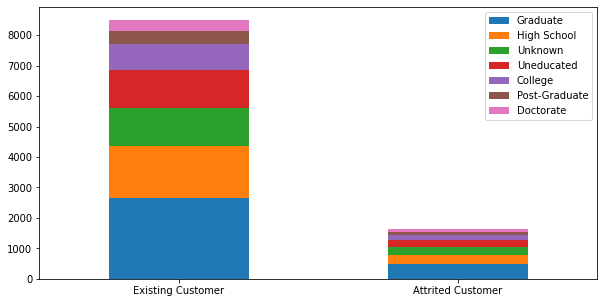

In [133]:
bar_chart('Education_Level')
## unknown 알수 없음
## uneducated 중졸이하
## high school 고졸
## colleage 학사
## graduate / post-graduate 석사
## Docotrate 박사


In [134]:
## Unknown 학력을 알수 없는 정도가 1263
## Uneducated 1250

df[df['Attrition_Flag']==0]['Education_Level'].value_counts()

Graduate         2641
High School      1707
Unknown          1263
Uneducated       1250
College           859
Post-Graduate     424
Doctorate         356
Name: Education_Level, dtype: int64

In [135]:
df.groupby(['Education_Level','Income_Category']).count()

CLIENTNUM  Attrition_Flag  Customer_Age  \
Education_Level Income_Category                                            
College         $120K +                 70              70            70   
                $40K - $60K            183             183           183   
                $60K - $80K            132             132           132   
                $80K - $120K           175             175           175   
                Less than $40K         345             345           345   
                Unknown                108             108           108   
Doctorate       $120K +                 37              37            37   
                $40K - $60K             70              70            70   
                $60K - $80K             59              59            59   
                $80K - $120K            57              57            57   
                Less than $40K         158             158           158   
                Unknown                 70              70            70   
Graduate        $120K +                204             204           204   
                $40K - $60K            553             553           553   
                $60K - $80K            422             422           422   
                $80K - $120K           478             478           478   
                Less than $40K        1139            1139          1139   
                Unknown                332             332           332   
High School     $120K +                147             147           147   
                $40K - $60K            355             355           355   
                $60K - $80K            307             307           307   
                $80K - $120K           308             308           308   
                Less than $40K         671             671           671   
                Unknown                225             225           225   
Post-Graduate   $120K +                 30              30            30   
                $40K - $60K            111             111           111   
                $60K - $80K             77              77            77   
                $80K - $120K            81              81            81   
                Less than $40K         170             170           170   
                Unknown                 47              47            47   
Uneducated      $120K +                119             119           119   
                $40K - $60K            249             249           249   
                $60K - $80K            195             195           195   
                $80K - $120K           217             217           217   
                Less than $40K         522             522           522   
                Unknown                185             185           185   
Unknown         $120K +                120             120           120   
                $40K - $60K            269             269           269   
                $60K - $80K            210             210           210   
                $80K - $120K           219             219           219   
                Less than $40K         556             556           556   
                Unknown                145             145           145   

                                 Gender  Dependent_count  Marital_Status  \
Education_Level Income_Category                                            
College         $120K +              70               70              70   
                $40K - $60K         183              183             183   
                $60K - $80K         132              132             132   
                $80K - $120K        175              175             175   
                Less than $40K      345              345             345   
                Unknown             108              108             108   
Doctorate       $120K +              37               37              37   
    

In [136]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [137]:
df[['Education_Level','Income_Category']].value_counts()

Education_Level  Income_Category
Graduate         Less than $40K     1139
High School      Less than $40K      671
Unknown          Less than $40K      556
Graduate         $40K - $60K         553
Uneducated       Less than $40K      522
Graduate         $80K - $120K        478
                 $60K - $80K         422
High School      $40K - $60K         355
College          Less than $40K      345
Graduate         Unknown             332
High School      $80K - $120K        308
                 $60K - $80K         307
Unknown          $40K - $60K         269
Uneducated       $40K - $60K         249
High School      Unknown             225
Unknown          $80K - $120K        219
Uneducated       $80K - $120K        217
Unknown          $60K - $80K         210
Graduate         $120K +             204
Uneducated       $60K - $80K         195
                 Unknown             185
College          $40K - $60K         183
                 $80K - $120K        175
Post-Graduate    Less th

In [138]:
cnt = df[['Education_Level','Gender','Income_Category']].groupby(['Education_Level', 'Income_Category'])
cnt

In [139]:
temp = df[['Education_Level','Marital_Status','Income_Category']].groupby(['Education_Level', 'Income_Category'])

temp.count()

Marital_Status
Education_Level Income_Category                
College         $120K +                      70
                $40K - $60K                 183
                $60K - $80K                 132
                $80K - $120K                175
                Less than $40K              345
                Unknown                     108
Doctorate       $120K +                      37
                $40K - $60K                  70
                $60K - $80K                  59
                $80K - $120K                 57
                Less than $40K              158
                Unknown                      70
Graduate        $120K +                     204
                $40K - $60K                 553
                $60K - $80K                 422
                $80K - $120K                478
                Less than $40K             1139
                Unknown                     332
High School     $120K +                     147
                $40K - $60K                 355
                $60K - $80K                 307
                $80K - $120K                308
                Less than $40K              671
                Unknown                     225
Post-Graduate   $120K +                      30
                $40K - $60K                 111
                $60K - $80K                  77
                $80K - $120K                 81
                Less than $40K              170
                Unknown                      47
Uneducated      $120K +                     119
                $40K - $60K                 249
                $60K - $80K                 195
                $80K - $120K                217
                Less than $40K              522
                Unknown                     185
Unknown         $120K +                     120
                $40K - $60K                 269
                $60K - $80K                 210
                $80K - $120K                219
                Less than $40K              556
                Unknown                     145

In [140]:
temp = df[['Education_Level','Marital_Status','Income_Category']].groupby(['Education_Level', 'Income_Category'])

temp.count()

Marital_Status
Education_Level Income_Category                
College         $120K +                      70
                $40K - $60K                 183
                $60K - $80K                 132
                $80K - $120K                175
                Less than $40K              345
                Unknown                     108
Doctorate       $120K +                      37
                $40K - $60K                  70
                $60K - $80K                  59
                $80K - $120K                 57
                Less than $40K              158
                Unknown                      70
Graduate        $120K +                     204
                $40K - $60K                 553
                $60K - $80K                 422
                $80K - $120K                478
                Less than $40K             1139
                Unknown                     332
High School     $120K +                     147
                $40K - $60K                 355
                $60K - $80K                 307
                $80K - $120K                308
                Less than $40K              671
                Unknown                     225
Post-Graduate   $120K +                      30
                $40K - $60K                 111
                $60K - $80K                  77
                $80K - $120K                 81
                Less than $40K              170
                Unknown                      47
Uneducated      $120K +                     119
                $40K - $60K                 249
                $60K - $80K                 195
                $80K - $120K                217
                Less than $40K              522
                Unknown                     185
Unknown         $120K +                     120
                $40K - $60K                 269
                $60K - $80K                 210
                $80K - $120K                219
                Less than $40K              556
                Unknown                     145

### Unknown에 대한 처리 방법은
    1. Unknown도 하나의 category로 해석
    2. Unknown값이 있는 행을 삭제하거나, 칼럼 자체(피처)를 삭제
    3. 모델링을 활용하여 대체를 하는 방법이 있다.
    4. 최빈값으로 대체
### 일단 모델링에서 답은 없고 여러가지로 시도해보는것이 가장 중요한것 같다.

## Unknown 처리
### isnull( ).sum( ) 에서는 결측치가 관찰되지 않았지만, Unknown도 결측치로 처리해주어야한다. 
#### 결측치로 처리 되지 않았던 Unknown을 np.nan으로 결측치로 처리를 해주고, 대표값(최빈값)으로 결측치를 대체해준다.

In [141]:
df["Education_Level"].replace({"Unknown":np.nan,
                                "Graduate":0,
                                "Post-Graduate":1,
                                "Uneducated":2,
                                "College":3,
                                "Doctorate":4,
                                "High School":5,
                                 },inplace=True)

In [142]:
df["Marital_Status"].replace({"Unknown":np.nan,
                                "Married":0,
                                "Single":1,
                                "Divorced":2,
                                 },inplace=True)

In [143]:
df["Income_Category"].replace({"Unknown":np.nan,
                                "Less than $40K":0,
                                "$40K - $60K":1,
                                "$60K - $80K":2,
                                "$80K - $120K":3,
                                "$120K +":4,
                                 },inplace=True)

In [144]:
# Unknown이 결측치로 대체 된것을 확인할 수 있다.
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
age_bin                        0
dtype: int64

In [145]:
# 대표값 이용 결측치 대체 모듈 
from sklearn.impute import SimpleImputer
# 각 데이터에 사용할 인스턴스 생성
SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 최빈값
# 학습
SI_mode.fit(df)
df = pd.DataFrame(SI_mode.transform(df),
                            columns = df.columns)

In [146]:
# 결측치 대체를 확인할 수 있다.
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
age_bin                     0
dtype: int64

# 수치형(Numerics) 피처 전처리

In [147]:
df[Numerics]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.76
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLIENTNUM                 10127 non-null  object
 1   Attrition_Flag            10127 non-null  object
 2   Customer_Age              10127 non-null  object
 3   Gender                    10127 non-null  object
 4   Dependent_count           10127 non-null  object
 5   Education_Level           10127 non-null  object
 6   Marital_Status            10127 non-null  object
 7   Income_Category           10127 non-null  object
 8   Card_Category             10127 non-null  object
 9   Months_on_book            10127 non-null  object
 10  Total_Relationship_Count  10127 non-null  object
 11  Months_Inactive_12_mon    10127 non-null  object
 12  Contacts_Count_12_mon     10127 non-null  object
 13  Credit_Limit              10127 non-null  object
 14  Total_Revolving_Bal   

In [149]:
df["Attrition_Flag"]

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object

**중간에 dtype이 모두 object로 바뀌어서 에러가 났다.**

In [150]:
df[Numerics]=df[Numerics].astype("float")
df[Labels]=df[Labels].astype("int")
df[Orders]=df[Orders].astype("int")
df["Attrition_Flag"]=df["Attrition_Flag"].astype("int")

# 여기서 모든 데이터 타입을 float으로 바꾸어도 되는 것인지 궁금하다.

In [151]:
df["Attrition_Flag"]

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int32

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  object 
 1   Attrition_Flag            10127 non-null  int32  
 2   Customer_Age              10127 non-null  float64
 3   Gender                    10127 non-null  int32  
 4   Dependent_count           10127 non-null  float64
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  int32  
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  float64
 11  Months_Inactive_12_mon    10127 non-null  float64
 12  Contacts_Count_12_mon     10127 non-null  float64
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [153]:
df[Orders].value_counts()

Education_Level  Income_Category  Card_Category
0                0                0                2064
5                0                0                 854
0                1                0                 766
2                0                0                 671
0                3                0                 638
                                                   ... 
4                4                3                   1
                                  2                   1
1                0                3                   1
4                2                2                   1
1                0                2                   1
Length: 97, dtype: int64

In [154]:
# plt.subplots(figsize=(20,9))
# plt.tick_params(axis='x',labelcolor='white')
# plt.tick_params(axis='y',labelcolor='white')
# sns.heatmap(df[Numerics].corr(),annot = True )

**Month_on_book과 Customer_Age의 상관계수는 0.79 정도로 상관계수가 높지만, 도메인 관점에서 완전히 다른 각각의 변수이므로 이 변수들을 삭제하지는 않는다. 하지만 Credit_Limit와 Avg_Utilization_Ratio는 상관계수가 0.48이지만 같은 변수에서 파생되었기 때문에 둘중 하나의 변수만 나두고 나머지 하나는 삭제처리가 필요하다**

   ### 같은 변수에서  파생된 변수이기 때문에 변수 선택이 필요하다.
   #### 1. 'Avg_Open_To_Buy' = 'Credit_Limit' - 'Total_Revolving_Bal'
   #### 2. 'Avg_Utilization_Ratio' = 'Total_Revolving_Bal'/ 'Credit_Limit' 
   #### 3. Total_Trans_Amt와 Total_Trans_Ct 둘 중에 하나의 변수 선택이 필요하다. 같은 계열의 변수 - 거래 승인 대금과 거래 승인 횟수는 상관관계가 높을 수 밖에 없다.(상관계수 0.81)
   
### 피처간의 상관관계가 높은 변수들에서 어떤 변수들을 삭제할지를 결정할 때에는 타겟변수(종속변수)와의 상관관계까지 고려하여 타겟과의 상관관계가 높은 변수들을 선택한다.

In [155]:
from scipy.stats import pointbiserialr

features = ['Avg_Open_To_Buy','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio','Total_Trans_Amt','Total_Trans_Ct'] 

for feature in features:
    target_feature_corr = pointbiserialr(df['Attrition_Flag'], df[feature])
    print("Attrition_Flag와",feature,"의 상관관계는",target_feature_corr,"입니다.")
   

Attrition_Flag와 Avg_Open_To_Buy 의 상관관계는 PointbiserialrResult(correlation=-0.0002850774939377916, pvalue=0.9771160894272927) 입니다.
Attrition_Flag와 Credit_Limit 의 상관관계는 PointbiserialrResult(correlation=-0.023872994836161524, pvalue=0.016285357205075734) 입니다.
Attrition_Flag와 Total_Revolving_Bal 의 상관관계는 PointbiserialrResult(correlation=-0.2630528831292033, pvalue=6.63014845528616e-160) 입니다.
Attrition_Flag와 Avg_Utilization_Ratio 의 상관관계는 PointbiserialrResult(correlation=-0.17841033156174702, pvalue=3.3576893281803397e-73) 입니다.
Attrition_Flag와 Total_Trans_Amt 의 상관관계는 PointbiserialrResult(correlation=-0.168598381410079, pvalue=1.8574386556246087e-65) 입니다.
Attrition_Flag와 Total_Trans_Ct 의 상관관계는 PointbiserialrResult(correlation=-0.3714027011889277, pvalue=0.0) 입니다.


**여기서 p-value의 의미 해석하기**

**상관관계가 낮은 Avg_Open_To_Buy,Avg_Utilization_Ratio,Total_Trans_Amt는 삭제(drop)**

In [156]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_bin
0,768805383,0,45.0,0,3.0,5,0,2,0,39.0,...,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061,40대
1,818770008,0,49.0,1,5.0,0,1,0,0,44.0,...,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105,40대
2,713982108,0,51.0,0,3.0,0,0,3,0,36.0,...,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000,50대
3,769911858,0,40.0,1,4.0,5,0,0,0,34.0,...,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760,40대
4,709106358,0,40.0,0,3.0,2,0,2,0,21.0,...,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50.0,0,2.0,0,1,1,0,40.0,...,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462,50대
10123,710638233,1,41.0,0,2.0,0,2,1,0,25.0,...,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511,40대
10124,716506083,1,44.0,1,1.0,5,0,0,0,36.0,...,4.0,5409.0,0.0,5409.0,0.819,10291.0,60.0,0.818,0.000,40대
10125,717406983,1,30.0,0,2.0,0,0,1,0,36.0,...,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000,30대


In [157]:
df.drop(["CLIENTNUM", # 식별자 삭제
         "Avg_Open_To_Buy",
         "Avg_Utilization_Ratio",
         "Total_Trans_Amt",
         "age_bin",
         "Total_Amt_Chng_Q4_Q1"], axis=1,inplace=True)

# 수치형 변수 log변환 정규화 변환

In [158]:
# 수치형 변수 중에 drop시킨 변수를 제외한 나머지 변수들을 모은 리스트를 만든다.
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Total_Ct_Chng_Q4_Q1', 
       'Total_Trans_Ct'] 

In [159]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0,45.0,0,3.0,5,0,2,0,39.0,5.0,1.0,3.0,12691.0,777.0,42.0,1.625
1,0,49.0,1,5.0,0,1,0,0,44.0,6.0,1.0,2.0,8256.0,864.0,33.0,3.714
2,0,51.0,0,3.0,0,0,3,0,36.0,4.0,1.0,0.0,3418.0,0.0,20.0,2.333
3,0,40.0,1,4.0,5,0,0,0,34.0,3.0,4.0,1.0,3313.0,2517.0,20.0,2.333
4,0,40.0,0,3.0,2,0,2,0,21.0,5.0,1.0,0.0,4716.0,0.0,28.0,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50.0,0,2.0,0,1,1,0,40.0,3.0,2.0,3.0,4003.0,1851.0,117.0,0.857
10123,1,41.0,0,2.0,0,2,1,0,25.0,4.0,2.0,3.0,4277.0,2186.0,69.0,0.683
10124,1,44.0,1,1.0,5,0,0,0,36.0,5.0,3.0,4.0,5409.0,0.0,60.0,0.818
10125,1,30.0,0,2.0,0,0,1,0,36.0,4.0,3.0,3.0,5281.0,0.0,62.0,0.722


In [160]:
# sns.pairplot(df[Numerics])

In [161]:
# 편향이 심한 Credit_Limit은 로그 변환을 해주도록한다.

df["Credit_Limit"]=np.log1p(df["Credit_Limit"])

In [162]:
df["Credit_Limit"]

0        9.448727
1        9.018817
2        8.137103
3        8.105911
4        8.458928
           ...   
10122    8.295049
10123    8.361241
10124    8.596004
10125    8.572060
10126    9.248503
Name: Credit_Limit, Length: 10127, dtype: float64

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

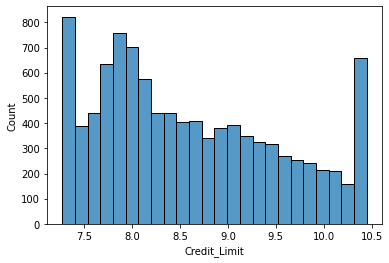

In [163]:
sns.histplot(df["Credit_Limit"])
# 편향이 조금 완화 된것을 확인 할 수 있다.

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for numeric in ['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']:
    df[numeric] = scaler.fit_transform(df[numeric].values.reshape(-1,1))

In [165]:
# 수치형 데이터 표준화 확인
df[Numerics]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct
0,-0.165406,3.0,39.0,5.0,1.0,3.0,0.905210,-0.473422,3.834003,-0.973895
1,0.333570,5.0,44.0,6.0,1.0,2.0,0.444695,-0.366667,12.608573,-1.357340
2,0.583058,3.0,36.0,4.0,1.0,0.0,-0.499786,-1.426858,6.807864,-1.911206
3,-0.789126,4.0,34.0,3.0,4.0,1.0,-0.533199,1.661686,6.807864,-1.911206
4,-0.789126,3.0,21.0,5.0,1.0,0.0,-0.155051,-1.426858,7.509325,-1.570365
...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,2.0,40.0,3.0,2.0,3.0,-0.330596,0.844455,0.608119,2.221481
10123,-0.664382,2.0,25.0,4.0,2.0,3.0,-0.259693,1.255524,-0.122745,0.176440
10124,-0.290150,1.0,36.0,5.0,3.0,4.0,-0.008217,-1.426858,0.444305,-0.207005
10125,-2.036565,2.0,36.0,4.0,3.0,3.0,-0.033865,-1.426858,0.041070,-0.121795


<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

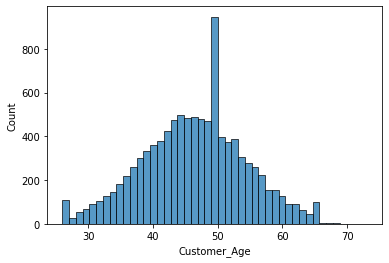

In [166]:
bankcurners = pd.read_csv("./data/BankChurners.csv")
sns.histplot(bankcurners["Customer_Age"],bins=45)

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bankcurners["Customer_Age"] = scaler.fit_transform(bankcurners["Customer_Age"].values.reshape(-1,1))

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

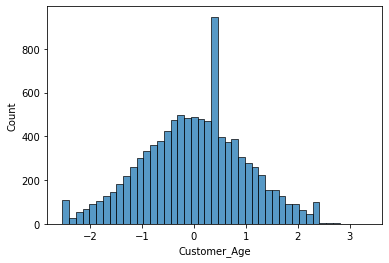

In [168]:
sns.histplot(bankcurners["Customer_Age"],bins=45)

# 지도학습 모델링

In [169]:
X = df.iloc[:,1:] # 피처 변수 
y = df.iloc[:,:1] # 타겟 변수 분리 

In [170]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,-0.165406,0,3.0,5,0,2,0,39.0,5.0,1.0,3.0,0.905210,-0.473422,-0.973895,3.834003
1,0.333570,1,5.0,0,1,0,0,44.0,6.0,1.0,2.0,0.444695,-0.366667,-1.357340,12.608573
2,0.583058,0,3.0,0,0,3,0,36.0,4.0,1.0,0.0,-0.499786,-1.426858,-1.911206,6.807864
3,-0.789126,1,4.0,5,0,0,0,34.0,3.0,4.0,1.0,-0.533199,1.661686,-1.911206,6.807864
4,-0.789126,0,3.0,2,0,2,0,21.0,5.0,1.0,0.0,-0.155051,-1.426858,-1.570365,7.509325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,0,2.0,0,1,1,0,40.0,3.0,2.0,3.0,-0.330596,0.844455,2.221481,0.608119
10123,-0.664382,0,2.0,0,2,1,0,25.0,4.0,2.0,3.0,-0.259693,1.255524,0.176440,-0.122745
10124,-0.290150,1,1.0,5,0,0,0,36.0,5.0,3.0,4.0,-0.008217,-1.426858,-0.207005,0.444305
10125,-2.036565,0,2.0,0,0,1,0,36.0,4.0,3.0,3.0,-0.033865,-1.426858,-0.121795,0.041070


In [171]:
y.astype

<bound method NDFrame.astype of        Attrition_Flag
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
10122               0
10123               1
10124               1
10125               1
10126               1

[10127 rows x 1 columns]>

In [172]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  float64
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  float64
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  float64
 14  Total_

In [175]:
# 로지스틱 회귀 모델링 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba  = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차 행렬
[[2063   62]
 [ 202  205]]
정확도: 0.8957, 정밀도: 0.7678, 재현율: 0.5037,    F1: 0.6083, AUC:0.8877


C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
lr_clf.predict_proba(X_test)[:,1]

array([0.00863104, 0.229741  , 0.80187171, ..., 0.00882803, 0.00767426,
       0.08691025])

In [177]:
type(y)

pandas.core.frame.DataFrame

In [178]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train,y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test,y_test)))

C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


테스트 세트 정확도 : 0.90


In [184]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.99136896, 0.00863104],
       [0.770259  , 0.229741  ],
       [0.19812829, 0.80187171],
       [0.87083326, 0.12916674],
       [0.99795304, 0.00204696],
       [0.98706976, 0.01293024],
       [0.9558137 , 0.0441863 ],
       [0.7772171 , 0.2227829 ],
       [0.98047956, 0.01952044],
       [0.99704734, 0.00295266]])

In [179]:
from sklearn.preprocessing import Binarizer


pred_proba_1 = lr_pred_proba.reshape(-1,1)

binarizer = Binarizer(threshold = 0.4)

In [180]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)     # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)         # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(accuracy, precision, recall))    

In [188]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임계값 = 0.5로 설정.  
c_threshold = 0.5

# predict_proba() 반환값이 [0확률, 1확률]로 반환 - positive 클래스 컬럼만 추출해서 Binarizer를 적용
pred_proba_1 = lr_pred_proba.reshape(-1,1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict )

오차행렬
[[2063   62]
 [ 202  205]]
정확도: 0.896, 정밀도: 0.768, 재현율: 0.504


In [193]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.05,0.11,0.2,0.3, 0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

In [194]:
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)


임곗값: 0.05
오차행렬
[[1266  859]
 [  40  367]]
정확도: 0.645, 정밀도: 0.299, 재현율: 0.902

임곗값: 0.11
오차행렬
[[1644  481]
 [  66  341]]
정확도: 0.784, 정밀도: 0.415, 재현율: 0.838

임곗값: 0.2
오차행렬
[[1854  271]
 [  99  308]]
정확도: 0.854, 정밀도: 0.532, 재현율: 0.757

임곗값: 0.3
오차행렬
[[1975  150]
 [ 140  267]]
정확도: 0.885, 정밀도: 0.640, 재현율: 0.656

임곗값: 0.4
오차행렬
[[2034   91]
 [ 175  232]]
정확도: 0.895, 정밀도: 0.718, 재현율: 0.570

임곗값: 0.45
오차행렬
[[2048   77]
 [ 185  222]]
정확도: 0.897, 정밀도: 0.742, 재현율: 0.545

임곗값: 0.5
오차행렬
[[2063   62]
 [ 202  205]]
정확도: 0.896, 정밀도: 0.768, 재현율: 0.504

임곗값: 0.55
오차행렬
[[2072   53]
 [ 218  189]]
정확도: 0.893, 정밀도: 0.781, 재현율: 0.464

임곗값: 0.6
오차행렬
[[2085   40]
 [ 231  176]]
정확도: 0.893, 정밀도: 0.815, 재현율: 0.432


In [205]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [206]:
print('임계값 shape: ', thresholds.shape)
print('정밀도 shape: ', precisions.shape)
print('재현율 shape: ', recalls.shape)

임계값 shape:  (2406,)
정밀도 shape:  (2407,)
재현율 shape:  (2407,)


In [207]:
idx = np.arange(0, thresholds.shape[0],15) # 15개씩 뛰어가며 임계값 만들기
print('sample index: ', idx)
print('임계값 sample: ', np.round(thresholds[idx], 3))
print('정밀도 sample: ', np.round(precisions[idx], 3))
print('재현율 sample: ', np.round(recalls[idx], 3))
# 임계값을 0.1 로줌
# 재현율이 좋게 나와야 된다고 하지만 이렇게 나온것은 쓰이지 않는다...

sample index:  [   0   15   30   45   60   75   90  105  120  135  150  165  180  195
  210  225  240  255  270  285  300  315  330  345  360  375  390  405
  420  435  450  465  480  495  510  525  540  555  570  585  600  615
  630  645  660  675  690  705  720  735  750  765  780  795  810  825
  840  855  870  885  900  915  930  945  960  975  990 1005 1020 1035
 1050 1065 1080 1095 1110 1125 1140 1155 1170 1185 1200 1215 1230 1245
 1260 1275 1290 1305 1320 1335 1350 1365 1380 1395 1410 1425 1440 1455
 1470 1485 1500 1515 1530 1545 1560 1575 1590 1605 1620 1635 1650 1665
 1680 1695 1710 1725 1740 1755 1770 1785 1800 1815 1830 1845 1860 1875
 1890 1905 1920 1935 1950 1965 1980 1995 2010 2025 2040 2055 2070 2085
 2100 2115 2130 2145 2160 2175 2190 2205 2220 2235 2250 2265 2280 2295
 2310 2325 2340 2355 2370 2385 2400]
임계값 sample:  [0.002 0.003 0.003 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.005 0.005
 0.005 0.006 0.006 0.006 0.006 0.007 0.007 0.007 0.008 0.008 0.008 0.009
 0.009 0

In [208]:
col_dict={'임곗값': np.round(thresholds[idx], 2),
          '정밀도': np.round(precisions[idx], 3),
          '재현율': np.round(recalls[idx], 3)}
df = pd.DataFrame(col_dict)
df

,임곗값,정밀도,재현율
0,0.00,0.169,1.000
1,0.00,0.170,0.998
2,0.00,0.171,0.998
3,0.00,0.172,0.995
4,0.00,0.173,0.995
...,...,...,...
156,0.89,0.970,0.157
157,0.91,0.961,0.120
158,0.94,0.944,0.084
159,0.95,0.952,0.049


In [209]:
# 함수 만들기
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제 값  pred_proba_c1: 예측 확률 값
def precision_recall_curve_plot(y_test , pred_proba_c1): 
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143,)에서 143 추출
    # thresholds : 143이고, precisions과 recalls는 144개로 x, y축 값의 개수가 맞지 않으므로
    # precisions, recalls로 그래프 그리면 오류 
    # y 값을 [0:threshold_boundary] ([0:143])로 143개 추출해서 x축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

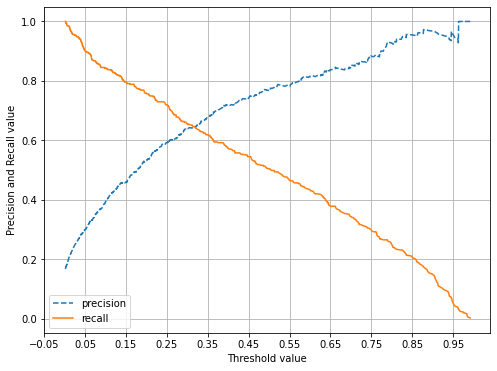

In [210]:
precision_recall_curve_plot(y_test, lr_pred_proba)

In [224]:
## 학습 데이터와 테스트 데이터 레이블 분포 확인
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Attrition_Flag
0                 83.936801
1                 16.063199
dtype: float64
테스트 데이터 레이블 값 비율
Attrition_Flag
0                 83.92575
1                 16.07425
dtype: float64


In [225]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [226]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[2063   62]
 [ 202  205]]
정확도: 0.8957, 정밀도: 0.7678, 재현율: 0.5037,    F1: 0.6083, AUC:0.8877


C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [227]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba) ## 평가진행 함수 호출

In [228]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


오차 행렬
[[2063   62]
 [ 125  282]]
정확도: 0.9261, 정밀도: 0.8198, 재현율: 0.6929,    F1: 0.7510, AUC:0.9594


In [235]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_test, y_test)]

# 학습 : 조기 중단 수행 가능(XGBoost와 동일)

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                eval_metric='logloss', eval_set=evals, verbose=True)

# 예측
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

C:\Users\ahj93\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's binary_logloss: 0.393357
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.36189
[3]	valid_0's binary_logloss: 0.336674
[4]	valid_0's binary_logloss: 0.317892
[5]	valid_0's binary_logloss: 0.302543
[6]	valid_0's binary_logloss: 0.289785
[7]	valid_0's binary_logloss: 0.278442
[8]	valid_0's binary_logloss: 0.268781
[9]	valid_0's binary_logloss: 0.260124
[10]	valid_0's binary_logloss: 0.2525
[11]	valid_0's binary_logloss: 0.246068
[12]	valid_0's binary_logloss: 0.240281
[13]	valid_0's binary_logloss: 0.23437
[14]	valid_0's binary_logloss: 0.229837
[15]	valid_0's binary_logloss: 0.225454
[16]	valid_0's binary_logloss: 0.221981
[17]	valid_0's binary_logloss: 0.218789
[18]	valid_0's binary_logloss: 0.215839
[19]	valid_0's binary_logloss: 0.211871
[20]	valid_0's binary_logloss: 0.209401
[21]	valid_0's binary_logloss: 0.207118
[22]	valid_0's binary_logloss: 0.204722
[23]	valid_0's binary_logloss: 0.202081
[24]	valid_0's binary_logloss: 

In [236]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [237]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[2068   57]
 [ 125  282]]
정확도: 0.9281, 정밀도: 0.8319, 재현율: 0.6929,F1: 0.7560, AUC:0.9619


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

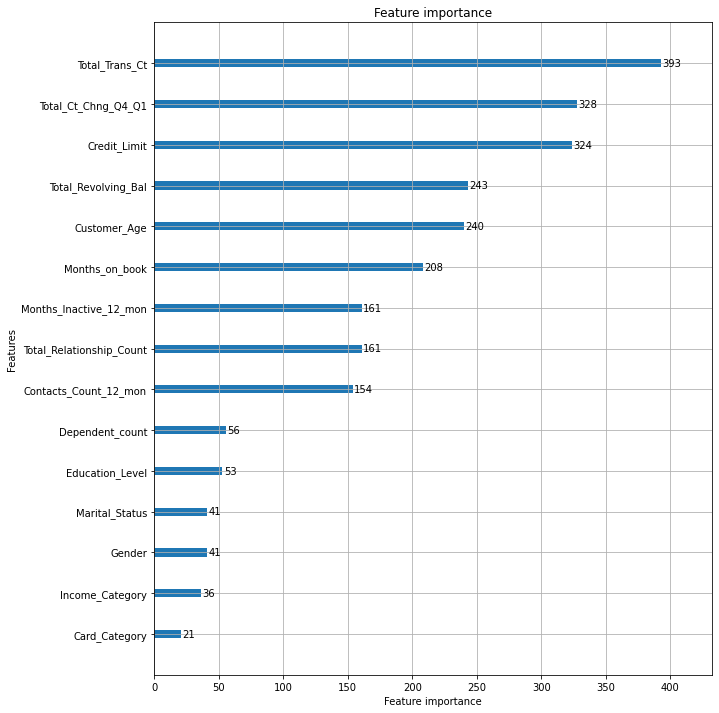

In [238]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)